### Amrithraj K P
### 2311022


In [ ]:
from Amrith_lib import *
import matplotlib.pyplot as plt

# Question-1

200.00000000000028


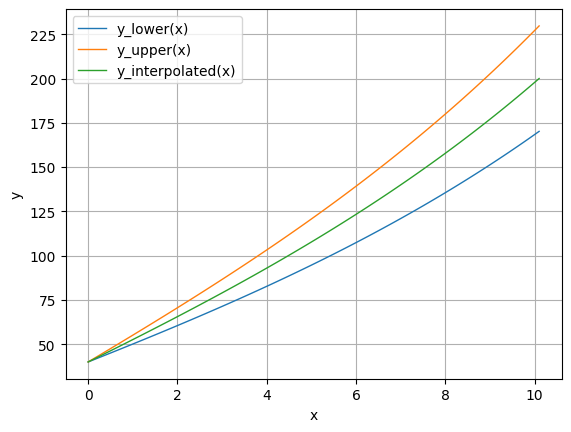

closest to 100 at x=4.5


In [49]:
alpha=0.01
T_alpha=20

def f2(x_vec,t):
    T=x_vec[0]
    dTdx=x_vec[1]

    return [dTdx, -alpha*(T_alpha-T)]


def shooting_solve(f,t_range,boundary_vals,guess,step_size=0.1):
    g_l,g_h=guess
    y_x0,y_b=boundary_vals
    init_1=[y_x0,g_l]
    init_2=[y_x0,g_h]
    sol_1=RK4_solve(f,init_1,t_range,step_size=step_size)
    sol_2=RK4_solve(f,init_2,t_range,step_size=step_size)
    y_xi_l=sol_1[1][-1][0]
    y_xi_h=sol_2[1][-1][0]

    if y_xi_h<y_b:
        print(f'upper guess is wrong, val={y_xi_h}')
        return

    if y_xi_l>y_b:
        print(f'lower guess is wrong, val={y_xi_l}')
        return
    
    xi = g_l + ((g_h-g_l)/(y_xi_h-y_xi_l))*(y_b-y_xi_l)
    initial=[y_x0,xi]
    solution=RK4_solve(f,initial,t_range,step_size=step_size)
    x_lower=[sol_1[1][i][0] for i in range(len(sol_1[1]))]
    x_upper=[sol_2[1][i][0] for i in range(len(sol_2[1]))]
    x_interpolated=[solution[1][i][0] for i in range(len(solution[1]))]
    print(solution[1][-1][0])
    x=solution[0]

    return x,x_lower,x_upper,x_interpolated

x,y_lower,y_upper,y_interpolated=shooting_solve(f2,[0,10],[40,200],[10,15])
plt.plot(x,y_lower,label='y_lower(x)',linewidth=1)
plt.plot(x,y_upper,label='y_upper(x)',linewidth=1)
plt.plot(x,y_interpolated,label='y_interpolated(x)',linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# finding x at which temperature is 100 (minimal fixes)
target = 100
out = abs(target - y_interpolated[0])
i = 0
x_index = 0
while i < len(y_interpolated):
    diff = abs(y_interpolated[i] - target)
    if diff < out:
        out = diff
        x_index = i
    i += 1

print(f'closest to 100 at x={x[x_index]}')






# Question-2

999


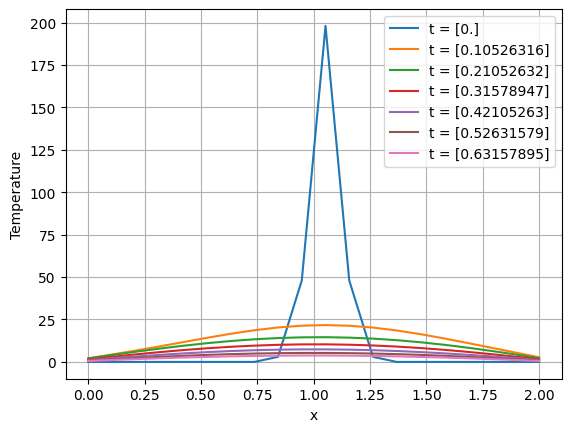

In [104]:
#uxx = ut

def heateqn_soln(initial,t_range,n_t):
    x_step=2/len(initial)
    n_x=len(initial)
    t0,tf=t_range
    t_step=(tf-t0)/n_t
    A=make_zeros(n_x)
    alpha=t_step/(x_step**2)
    if alpha>0.5:
        print(f'alpha={alpha}')
        return
    ##constructing A
    for i in range(n_x):
        for j in range(n_x):
            if i==j:
                A[i][j]= 1 - 2*alpha
            if i==j+1 or j == i+1:
                A[i][j] = alpha
    An=A
    sol=[]
    for i in range(n_t-1):
        An=matrix_mult(An,A)
        out=[]
        for i in range(n_x):
            temp=0
            for j in range(n_x):
                temp+=An[i][j]*initial[j]
            out.append(temp)
        sol.append(out)
    
    return sol

initial_cond=[0]*20
initial_cond[len(initial_cond)//2]=300
x=np.linspace(0,2,20)
y=heateqn_soln(initial_cond,[0,1],1000)
temp_num=len(y)
print(temp_num)
diff=np.arange(0,temp_num,150)
for k in diff:
    plt.plot(x,y[k],label=f't = {x[np.where(diff == k)]}')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()